# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "林以翎"
student_id = "B06201024"

---

# Exercise 1 - Secant

### Use the secant method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define a function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$.

In [3]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        # Hint: return ...
        # ===== 請實做程式 =====
        return np.cosh(x)+np.cos(x)-c
        # ====================
    return f

Pass the following assertion.

In [4]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1

### 2. Implement the algorithm

In [5]:
def secant(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False,
):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    func : function
        The target function.
    interval: list
        The initial interval to search
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.

    Returns
    -------
    result: float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    
    # ===== 請實做程式 =====
     # Ensure the initial interval is valid
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'
    
    # Set the initial condition
    num_iterations = 0
    a_next, b_next = a, b
    
    # history of solving process
    if report_history:
        history = {'estimation': [], 'x_error': [], 'y_error': []}
    
    while True:
        # Find the next point
        d_x = - func(a_next) * (b_next - a_next) / (func(b_next) - func(a_next))
        c = a_next + d_x
        
        # Evaluate the error
        x_error = abs(d_x)
        y_error = abs(func(c))

        if report_history:
            history['estimation'].append(c)
            history['x_error'].append(x_error)
            history['y_error'].append(y_error)

        # Satisfy the criterion and stop
        if x_error < tolerance or y_error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            return (c, history) if report_history else c
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1
        
            # Find the next interval
            value_of_func_c = func(c)
            if func(a_next) * value_of_func_c < 0:
                a_next = a_next
                b_next = c
            elif value_of_func_c * func(b_next) < 0:
                a_next = c
                b_next = b_next
            else:
                return (c, history) if report_history else c
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            return (c, history) if report_history else c

    # ====================

Test your implementation with the assertion below.

In [6]:
root = secant(lambda x: x**2 - x - 1, [1.0, 2.0], max_iterations=100, tolerance=1e-7, report_history=False)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

Found solution after 8 iterations.


---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

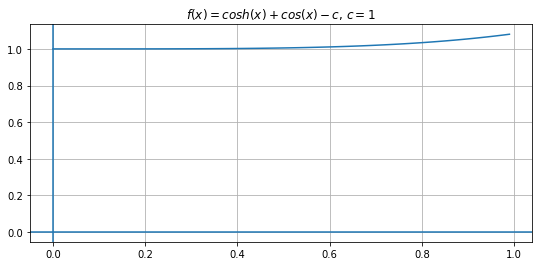

In [7]:
c = 1
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(0.0, 1.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [8]:
# Hint: root = ?
# ===== 請實做程式 =====
root = None
# ====================

In [9]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$.I f it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

Under the case $c=1$, since $f(x)>0$ for all $x$, there does not exist interval $[a,b]$ s.t. $f(a)f(b)<0$.

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

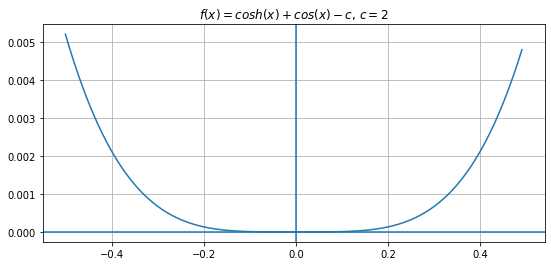

In [10]:
c = 2
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-0.5, 0.5, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [11]:
# Hint: root = ?
# ===== 請實做程式 =====
root = 0
# ====================

In [12]:
print('My estimation of root:', root)


My estimation of root: 0


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step.Otherwise, state the reason why the method failed on this case.

Under the case $c=2$, since $f(x) \geq 0$ for all $x$, there does not exist interval $[a,b]$ s.t. $f(a)f(b)<0$.

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

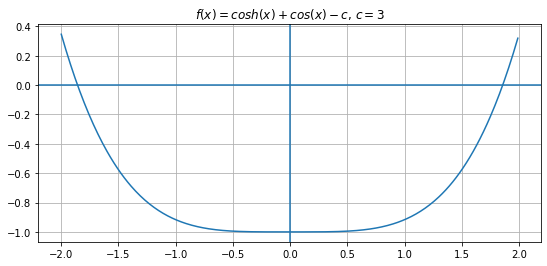

In [13]:
c = 3
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-2.0, 2.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [14]:
# Hint: root = ?
# ===== 請實做程式 =====
root = -1.8, 1.8 
# ====================

In [15]:
print('My estimation of root:', root)


My estimation of root: (-1.8, 1.8)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [16]:
solution, history = secant(f, [-2.0, -1.0], max_iterations=100, tolerance=1e-10, report_history=True)

Found solution after 10 iterations.


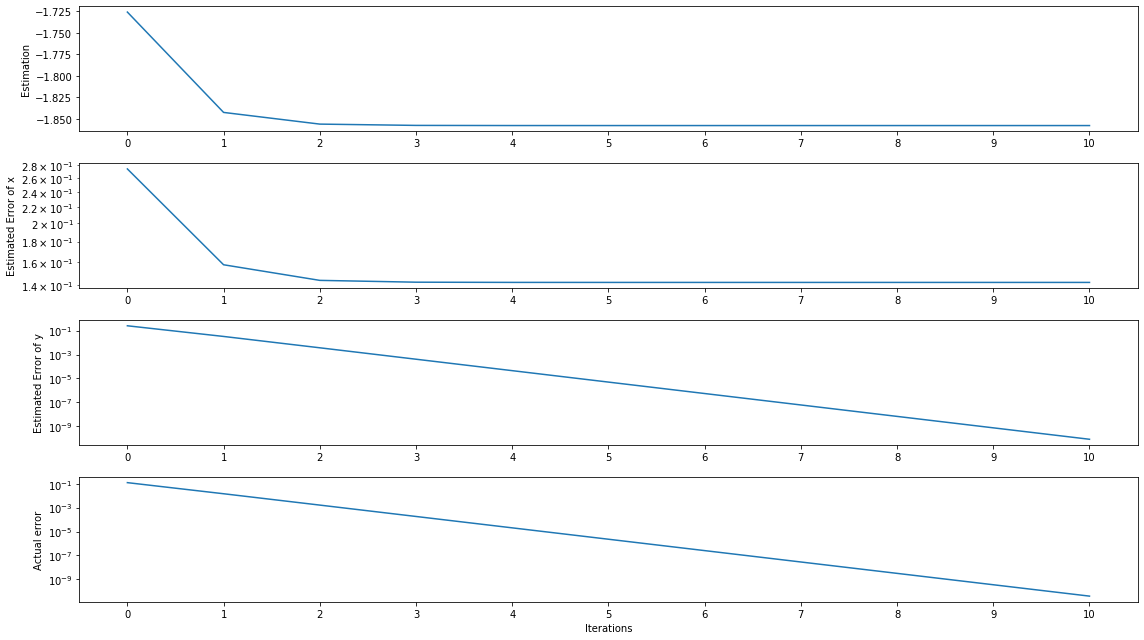

In [17]:
fig, axes = plt.subplots(4, 1, figsize=(16, 9))
ax1, ax2, ax3, ax4 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error of x (log(error of x)) in history
ax2.plot(iterations, history['x_error'])
ax2.set_ylabel('Estimated Error of x')
ax2.set_yscale('log')

# Plot the estimation error of y (log(error of y)) in history
ax3.plot(iterations, history['y_error'])
ax3.set_ylabel('Estimated Error of y')
ax3.set_yscale('log')

exact_solution_0 = -1.85792082915020
exact_solution = exact_solution_0

for i in range(1,num_iterations):
    exact_solution = np.hstack((exact_solution,exact_solution_0))

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-exact_solution)
ax4.plot(iterations, actual_error)
ax4.set_ylabel('Actual error')
ax4.set_yscale('log')
ax4.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

In [18]:
solution, history = secant(f, [1.0, 2.0], max_iterations=100, tolerance=1e-10, report_history=True)

Found solution after 10 iterations.


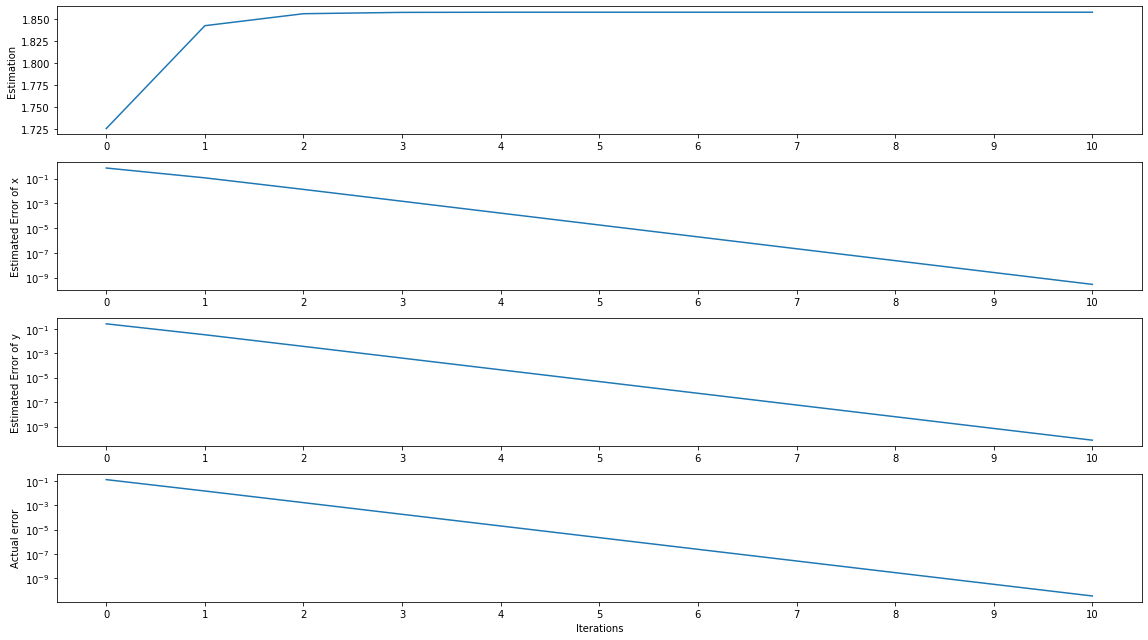

In [19]:
fig, axes = plt.subplots(4, 1, figsize=(16, 9))
ax1, ax2, ax3, ax4 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error of x (log(error of x)) in history
ax2.plot(iterations, history['x_error'])
ax2.set_ylabel('Estimated Error of x')
ax2.set_yscale('log')

# Plot the estimation error of y (log(error of y)) in history
ax3.plot(iterations, history['y_error'])
ax3.set_ylabel('Estimated Error of y')
ax3.set_yscale('log')

exact_solution_0 = 1.85792082915020
exact_solution = exact_solution_0

for i in range(1,num_iterations):
    exact_solution = np.hstack((exact_solution,exact_solution_0))

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-exact_solution)
ax4.plot(iterations, actual_error)
ax4.set_ylabel('Actual error')
ax4.set_yscale('log')
ax4.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

Under the case $c=1$ and $c=2$, since $f(x) \geq 0$ for all $x$, there does not exist interval $[a,b]$ s.t. $f(a)f(b)<0$, we can't use the algorithm.\
Under the case $c=3$, by observasion, error behaviors and estimations agree with the theoretical analysis, it converge fast.